In [3]:
from hawkes_discret.kernels import KernelExpDiscret
from hawkes_discret.hawkes_discret_l2 import HawkesDiscretL2
import torch
import numpy as np
import matplotlib.pyplot as plt
import time

In [4]:
dim = 2
baseline = torch.tensor([1, 2])
decay = torch.tensor([[2, 3], [8, 4]])
adjacency = torch.tensor([[1, 0.3], [0.1, 0.4]])
baseline = torch.ones(dim)
#decay = torch.ones(dim,dim)
#adjacency = torch.ones(dim,dim)
upper = 1
size_discret = 100
time = torch.linspace(0, 1, size_discret)

events_bool = torch.zeros(dim, 100000)
events_bool[0, ::3] += 1
events_bool[1, ::20] += 1

In [5]:
model = KernelExpDiscret(decay,  upper, 
                         0.01, size_grid=100000)

In [6]:
kernel_values = model.eval(time)

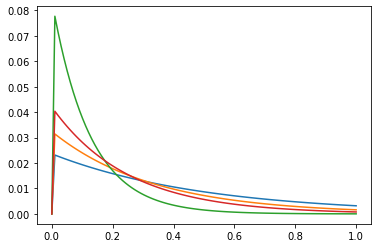

In [7]:
for i in range(dim):
    for j in range(dim):
        plt.plot(time, kernel_values[i,j])

In [8]:
events_bool

tensor([[1., 0., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 0., 0.]])

In [9]:
%time
intens = model.intensity_eval(baseline, adjacency, events_bool)


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs


In [10]:
%time
model.integrate()

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.82 µs


tensor([[1.0000, 1.0000],
        [1.0000, 1.0000]])

In [11]:
%time
model.grad_params(time).shape

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.34 µs


torch.Size([2, 2, 100])

In [1]:
from hawkes_discret.kernels import KernelExpDiscret
from hawkes_discret.hawkes_discret_l2 import HawkesDiscretL2
import torch
import numpy as np
import matplotlib.pyplot as plt
import time
kernel_model = 'KernelExpDiscret'
baseline = torch.tensor([1.1, 1.3])
kernel_params = torch.tensor([[2, 3], [8, 4]])
adjacency = torch.tensor([[1, 0.3], [0.1, 0.4]])
end_time = 5
discret_step = 0.1
events = [torch.tensor([0.7653, 0.76187, 2.323, 2.1]),torch.tensor([3.653, 2.76187, 4.323, 3.1]) ]
solver = HawkesDiscretL2(kernel_model, kernel_params, 
                 baseline,  adjacency, discret_step,
                 solver='RMSprop', step_size=1e-3,
                 max_iter=100, log=False,
                 random_state=None, device='cpu')

In [2]:
solver.kernel_model.eval(torch.linspace(0,1, 11)[:-1])
#solver.lossl2()

AttributeError: 'HawkesDiscretL2' object has no attribute 'events_loc_grid'

In [3]:
solver.opt

RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    eps: 1e-08
    lr: 0.001
    momentum: 0
    weight_decay: 0
)

In [18]:
a = torch.tensor([[1,1],[2,3]])

In [4]:
d1 = torch.tensor([0., 0., 1., 0., 0.])
d2 = torch.tensor([0., 0., 0., 0., 1.])

In [ ]:
torch.conv_transpose1d(
                    events_bool[i].view(1, self.size_grid),
                    kernel_values_adj[:, i].view(1, self.dim, self.size_discret))[:, :-self.size_discret+1]

In [8]:
C = torch.conv_transpose1d(d1[None], d2[None, None])

In [11]:
C

tensor([[0., 0., 0., 0., 0., 0., 1., 0., 0.]])